### Trailing Moving Average

#### Load Data

         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


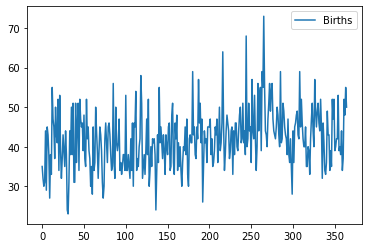

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('data/daily-total-female-births.csv')
print(series.head())

series.plot()
plt.show()

#### Data Preparation

      Births
0        NaN
1        NaN
2  32.333333
3  31.000000
4  35.000000
5  34.666667
6  39.333333
7  39.000000
8  42.000000
9  36.000000


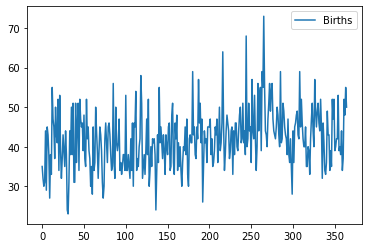

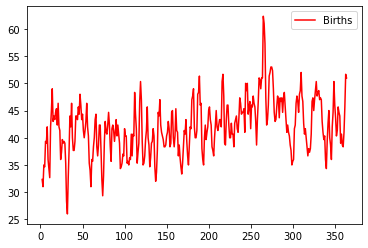

In [2]:
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

#### Feature Engineering

In [9]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

series = read_csv('data/daily-total-female-births.csv', header=0, index_col=0)
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

        mean   t-1  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


#### Prediction

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


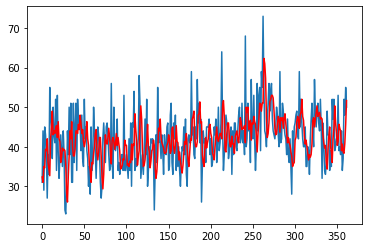

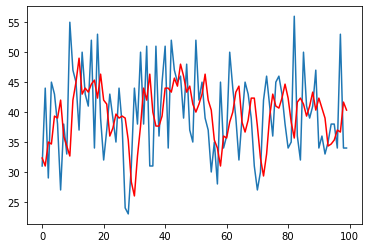

In [11]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

series = read_csv('data/daily-total-female-births.csv', header=0, index_col=0)
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()